# May Menachem's Project

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Description-of-the-data" data-toc-modified-id="Description-of-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Description of the data</a></span></li><li><span><a href="#Scheme-of-the-database" data-toc-modified-id="Scheme-of-the-database-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scheme of the database</a></span></li><li><span><a href="#Initialization-and-loading-the-data" data-toc-modified-id="Initialization-and-loading-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Initialization and loading the data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Printing-the-first-rows-of-each-table" data-toc-modified-id="Printing-the-first-rows-of-each-table-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Printing the first rows of each table</a></span></li><li><span><a href="#Checking-duplicated-values" data-toc-modified-id="Checking-duplicated-values-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Checking duplicated values</a></span></li><li><span><a href="#Checking-duplicated-rows" data-toc-modified-id="Checking-duplicated-rows-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Checking duplicated rows</a></span></li><li><span><a href="#Checking-missing-values" data-toc-modified-id="Checking-missing-values-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Checking missing values</a></span></li></ul></li><li><span><a href="#Tasks" data-toc-modified-id="Tasks-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Tasks</a></span><ul class="toc-item"><li><span><a href="#Finding-the-number-of-books-released-after-January-1,-2000" data-toc-modified-id="Finding-the-number-of-books-released-after-January-1,-2000-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Finding the number of books released after January 1, 2000</a></span></li><li><span><a href="#Finding-the-number-of-user-reviews-and-the-average-rating-for-each-book." data-toc-modified-id="Finding-the-number-of-user-reviews-and-the-average-rating-for-each-book.-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Finding the number of user reviews and the average rating for each book.</a></span></li><li><span><a href="#Identifying-the-publisher-that-has-released-the-greatest-number-of-books-with-more-than-50-pages" data-toc-modified-id="Identifying-the-publisher-that-has-released-the-greatest-number-of-books-with-more-than-50-pages-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Identifying the publisher that has released the greatest number of books with more than 50 pages</a></span></li><li><span><a href="#Identifying-the-author-with-the-highest-average-book-rating" data-toc-modified-id="Identifying-the-author-with-the-highest-average-book-rating-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Identifying the author with the highest average book rating</a></span></li><li><span><a href="#Finding-the-average-number-of-text-reviews-among-users-who-rated-more-than-50-books" data-toc-modified-id="Finding-the-average-number-of-text-reviews-among-users-who-rated-more-than-50-books-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Finding the average number of text reviews among users who rated more than 50 books</a></span></li></ul></li><li><span><a href="#Summary-and-conclusions" data-toc-modified-id="Summary-and-conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summary and conclusions</a></span></li></ul></div>

## Intro

The coronavirus took the entire world by surprise, changing everyone's daily routine. City dwellers no longer spent their free time outside, going to cafes and malls; more people were home, reading books. That attracted the attention of startups that rushed to develop new apps for book lovers.
You've been given a database of one of the services competing in this market. It contains data on books, publishers, authors, and customer ratings and reviews of books. This information will be used to generate a value proposition for a new product.

**Tasks:**
- Find the number of books released after January 1, 2000.
- Find the number of user reviews and the average rating for each book.
- Identify the publisher that has released the greatest number of books with more than 50 pages.
- Identify the author with the highest average book rating (look only at books with at least 50 ratings).
- Find the average number of text reviews among users who rated more than 50 books.

## Description of the data

- books: Contains data on books:
    - book_id
    - author_id
    - title
    - num_pages — number of pages
    - publication_date
    - publisher_id

- authors: Contains data on authors:
    - author_id
    - author

- publishers: Contains data on publishers:
    - publisher_id
    - publisher

- ratings: Contains data on user ratings:
    - rating_id
    - book_id
    - username — the name of the user who rated the book
    - rating

- reviews: Contains data on customer reviews:
    - review_id
    - book_id
    - username — the name of the user who reviewed the book
    - text — the text of the review

## Scheme of the database

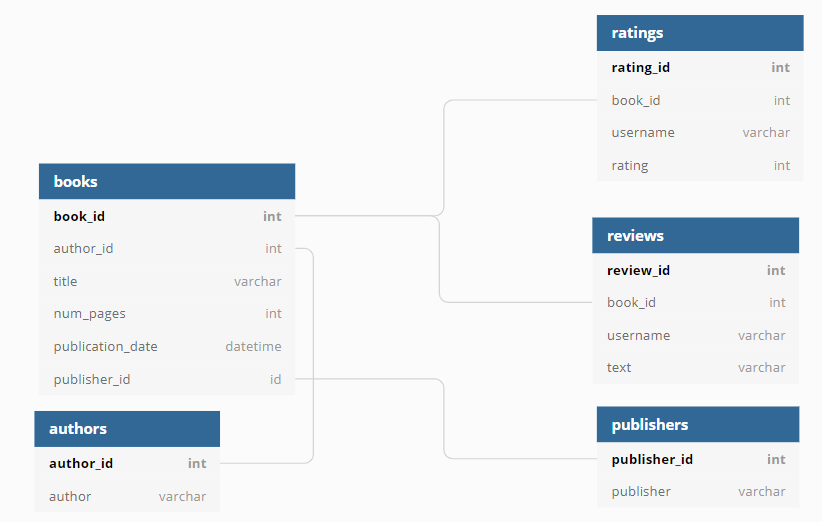

## Initialization and loading the data

In [1]:
# import libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Setting amount of rows to be displayed
pd.options.display.max_rows = 1000
# Setting amount of columns to be displayed
pd.set_option('display.max_columns', 50)

In [3]:
# In each cell, all output will be displayed 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
# connecting to the data base
db_config = {'user': 'practicum_student',         # username
             'pwd': 's65BlTKV3faNIGhmvJVzOqhs', # password
             'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
             'port': 6432,              # connection port
             'db': 'data-analyst-final-project-db'}          # the name of the database

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                                     db_config['pwd'],
                                                                       db_config['host'],
                                                                       db_config['port'],
                                                                       db_config['db'])

engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [5]:
# definning a function that outputs the result of an SQL query
def get_q_result(sql_query):
    return pd.io.sql.read_sql(sql_query, con = engine)

## Preprocessing

### Printing the first rows of each table

In [6]:
# creating a list of the tables
tables_list = ['books', 'authors', 'publishers', 'ratings', 'reviews']

# creating a query string
get_first_rows_q = 'SELECT * FROM {} LIMIT 10'

# printing the 10 first rows of each table
for table in tables_list:
    print("First 10 rows of the table:",table)
    get_q_result(get_first_rows_q.format(table))

First 10 rows of the table: books


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


First 10 rows of the table: authors


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


First 10 rows of the table: publishers


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


First 10 rows of the table: ratings


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


First 10 rows of the table: reviews


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


### Checking duplicated values 

Checking duplicate names or other values that are supposed to be unique in each table. The values in a primary key in each table are unique by definition so they will not be checked (a table cannot be created and stored with indistinct values in a column that is supposed to be the primary key).   

In [7]:
get_q_result(
 
     '''SELECT        DISTINCT text, COUNT(*) AS count
        FROM          reviews
        GROUP BY      text
        HAVING        COUNT(*) > 1
        ORDER BY      count DESC;
   
     '''
                    )

,text,count


In [8]:
get_q_result(
 
     '''SELECT        DISTINCT publisher, COUNT(*) AS count
        FROM          publishers
        GROUP BY      publisher
        HAVING        COUNT(*) > 1
        ORDER BY      count DESC;
   
     '''
                    )

,publisher,count


In [9]:
get_q_result(
 
     '''SELECT        DISTINCT author, COUNT(*) AS count
        FROM          authors
        GROUP BY      author
        HAVING        COUNT(*) > 1
        ORDER BY      count DESC;
   
     '''
                    )

,author,count


In [10]:
get_q_result(
 
     '''SELECT        DISTINCT title, COUNT(*) AS count
        FROM          books
        GROUP BY      title
        HAVING        COUNT(*) > 1
        ORDER BY      count DESC;
   
     '''
                    )

,title,count
0,Memoirs of a Geisha,2


There are no duplicates in names in any of the tables except for the books table in which the Memoirs of Geisha title is duplicated.

This means that in all the table above except for the book table there are definitely no duplicated rows. The rating table was not checked because it does not contain names.

### Checking duplicated rows

Looking if there are any duplicated rows in the rating table:

In [11]:
get_q_result(
 
     '''SELECT        book_id, username, rating, COUNT(*) AS count
        FROM          ratings
        GROUP BY      book_id, username, rating
        HAVING        COUNT(*)>1
        ORDER BY      count DESC;
      
   
     '''
                    )

,book_id,username,rating,count


There are no duplicated rows in the ratings table.

Looking for duplicated rows in the books table:

In [12]:
get_q_result(
 
     '''SELECT        author_id, title, publisher_id, num_pages, publication_date, COUNT(*) AS count
        FROM          books
        GROUP BY      author_id, title, publisher_id, num_pages, publication_date
        HAVING        COUNT(*)>1
        ORDER BY      count DESC;
      
   
     '''
                    )

,author_id,title,publisher_id,num_pages,publication_date,count


Regarding the books table Memoirs of Geisha appeared twice but there are no duplicated rows maybe Memoirs of Geisha is not a duplicate but a new edition. 

In [13]:
get_q_result(
 
     '''SELECT   *
        FROM     books
        WHERE    title= 'Memoirs of a Geisha' 
      
   
     '''
                    )

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,426,39,Memoirs of a Geisha,434,2005-11-15,241
1,427,39,Memoirs of a Geisha,503,2005-11-22,311


The Memoirs of Geisha by the same author was published again in another date with another publisher and different number of pages. But it is in the same year and even in the same month. It is not likely that the author switched publishers within a week from publishing the book. Unless the publishing company was sold or another rare scenario in which the publisher would have different publishers for different regions. Since it is not possible to know for sure the analysis will be done twice, with and without the duplicate, to see whether it changes the results in a significant manner.   

### Checking missing values

Checking missing values in columns that are not primary keys

In [14]:
get_q_result(
 
     '''SELECT      *     
        FROM       books
        WHERE      author_id IS NULL OR 
                   title IS NULL OR 
                   num_pages IS NULL OR 
                   publication_date IS NULL OR 
                   publisher_id IS NULL;
      
   
     '''
                    )

,book_id,author_id,title,num_pages,publication_date,publisher_id


In [15]:
get_q_result(
 
     '''SELECT     *    
        FROM       authors
        WHERE      author IS NULL;
      
   
     '''
                    )

,author_id,author


In [16]:
get_q_result(
 
     '''SELECT     *    
        FROM       publishers
        WHERE      publisher IS NULL;
      
   
     '''
                    )

,publisher_id,publisher


In [17]:
get_q_result(
 
     '''SELECT      *     
        FROM       ratings
        WHERE      book_id IS NULL OR 
                   username IS NULL OR 
                   rating IS NULL ;
      
   
     '''
                    )


,rating_id,book_id,username,rating


In [18]:
get_q_result(
 
     '''SELECT      *     
        FROM       reviews
        WHERE      book_id IS NULL OR 
                   username IS NULL OR 
                   text IS NULL ;
      
   
     '''
                    )

,review_id,book_id,username,text


There are no missing values in the tables.

## Tasks

### Finding the number of books released after January 1, 2000

In [19]:
print(" The number of books released after January 1, 2000 is:",
      get_q_result(
 
     '''SELECT   COUNT(DISTINCT book_id)
                 FROM books
                 WHERE publication_date > '2000-01-01'
     '''
                    )
      .iloc[0,0])

 The number of books released after January 1, 2000 is: 819


### Finding the number of user reviews and the average rating for each book.

In [20]:
# for the excplicit task
get_q_result(
 
     '''SELECT    title, COUNT(DISTINCT review_id) AS n_reviews, AVG(rating) AS avg_rating
        FROM  
                  books 
                  LEFT OUTER JOIN ratings ON books.book_id = ratings.book_id
                  LEFT OUTER JOIN reviews ON books.book_id = reviews.book_id      
        GROUP BY  title
        LIMIT 30

     '''
             )

,title,n_reviews,avg_rating
0,'Salem's Lot,2,3.666667
1,1 000 Places to See Before You Die,1,2.500000
2,13 Little Blue Envelopes (Little Blue Envelope...,3,4.666667
3,1491: New Revelations of the Americas Before C...,2,4.500000
4,1776,4,4.000000
5,1st to Die (Women's Murder Club #1),4,3.500000
6,2nd Chance (Women's Murder Club #2),3,3.000000
7,4th of July (Women's Murder Club #4),3,4.000000
8,A Beautiful Mind,2,4.250000
9,A Bend in the Road,3,3.200000


If the registration of the two books Memoirs of a Geisha is not considered faulty:

In [21]:
# additional analysis
get_q_result(
 
     '''SELECT    title, COUNT(DISTINCT review_id) AS n_reviews, AVG(rating) AS avg_rating, COUNT(DISTINCT rating_id) AS n_rating
        FROM  
                  books 
                  LEFT OUTER JOIN ratings ON books.book_id = ratings.book_id
                  LEFT OUTER JOIN reviews ON books.book_id = reviews.book_id      
        GROUP BY  title
        ORDER BY  n_reviews DESC, avg_rating DESC, n_rating DESC
        LIMIT 30
     '''
             )

,title,n_reviews,avg_rating,n_rating
0,Memoirs of a Geisha,8,4.138462,56
1,Twilight (Twilight #1),7,3.662500,160
2,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.414634,82
3,Harry Potter and the Chamber of Secrets (Harry...,6,4.287500,80
4,The Book Thief,6,4.264151,53
5,The Glass Castle,6,4.206897,29
6,The Hobbit or There and Back Again,6,4.125000,88
7,Outlander (Outlander #1),6,4.125000,24
8,The Curious Incident of the Dog in the Night-Time,6,4.081081,37
9,The Lightning Thief (Percy Jackson and the Oly...,6,4.080645,62


The most reviewed book is `Memoirs of a Geisha` with 8 reviews. 

The books that have an average rating of 4 and above have a wide range in terms of number of reviews (from 0 to 8) and ratings(1 to 88) so there is not necessarily a correlation between the number of reviews or the number of ratings and the average rating. 

The most reviewed and rated books are **mostly** fantasy series books like Twilight, Harry Potter and lord of the rings. 

If the registration of the two books Memoirs of a Geisha is considered faulty:

In [22]:
# additional analysis
get_q_result(
 
     '''SELECT    books.book_id, title,
                  COUNT(DISTINCT review_id) AS n_reviews, 
                  COUNT(DISTINCT rating_id) AS n_rating,
                  AVG(rating) AS avg_rating
        FROM  
                  books 
                  LEFT OUTER JOIN ratings ON books.book_id = ratings.book_id
                  LEFT OUTER JOIN reviews ON books.book_id = reviews.book_id      
        WHERE     books.book_id <> 427
        GROUP BY  books.book_id, title
        ORDER BY  n_reviews DESC, avg_rating DESC, n_rating DESC
        LIMIT 30
     '''
             )

,book_id,title,n_reviews,n_rating,avg_rating
0,948,Twilight (Twilight #1),7,160,3.662500
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,82,4.414634
2,299,Harry Potter and the Chamber of Secrets (Harry...,6,80,4.287500
3,656,The Book Thief,6,53,4.264151
4,734,The Glass Castle,6,29,4.206897
5,750,The Hobbit or There and Back Again,6,88,4.125000
6,497,Outlander (Outlander #1),6,24,4.125000
7,695,The Curious Incident of the Dog in the Night-Time,6,37,4.081081
8,779,The Lightning Thief (Percy Jackson and the Oly...,6,62,4.080645
9,963,Water for Elephants,6,44,3.977273


When the duplicated Memoirs of a Geisha is not taking into consideration the most reviewed book is `Twilight #1`.

The books that have an average rating of 4 and above have a wide range in terms of number of reviews (from 0 to 6) and ratings(1 to 88) so there is not necessarily a correlation between the number of reviews or the number of ratings and the average rating. 

The amount of reviews for each book is small (0-7).  

### Identifying the publisher that has released the greatest number of books with more than 50 pages 

This will help to exclude brochures and similar publications from the analysis.

In [23]:
# for the excplicit task
get_q_result(
 
     ''' SELECT      publisher, COUNT(book_id) AS n_books
         FROM 
                     publishers 
                     INNER JOIN books ON publishers.publisher_id = books.publisher_id
         WHERE       num_pages > 50      
         GROUP BY    publishers.publisher
         ORDER BY    COUNT(book_id) DESC
         LIMIT 1
    
     '''
             )

,publisher,n_books
0,Penguin Books,42


In [24]:
# additional analysis
get_q_result(
 
     ''' SELECT      publishers. *, COUNT(book_id) AS n_books
         FROM 
                     publishers 
                     INNER JOIN books ON publishers.publisher_id = books.publisher_id
         WHERE       num_pages > 50      
         GROUP BY    publishers.publisher_id
         ORDER BY    COUNT(book_id) DESC
         LIMIT 30
    
     '''
             )

,publisher_id,publisher,n_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,33,Ballantine Books,19
5,35,Bantam,19
6,45,Berkley,17
7,284,St. Martin's Press,14
8,46,Berkley Books,14
9,83,Delta,13


In [25]:
# additional analysis

get_q_result(
 
     ''' SELECT      publishers. *, COUNT(book_id) AS n_books
         FROM 
                     publishers 
                     INNER JOIN books ON publishers.publisher_id = books.publisher_id
         WHERE       num_pages > 50 AND books.book_id <> 427     
         GROUP BY    publishers.publisher_id
         ORDER BY    COUNT(book_id) DESC
         LIMIT 30
    
     '''
             )

,publisher_id,publisher,n_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,35,Bantam,19
5,33,Ballantine Books,19
6,45,Berkley,17
7,46,Berkley Books,14
8,284,St. Martin's Press,14
9,83,Delta,13


With or without the duplicated Memoirs of a Geisha, the publisher that has released the greatest number of books (42) with more than 50 pages is Penguin Books and it dominates the field. Most publishers published only few books with more than 50 pages. There are only 16 publishers with more than 10 books. 

### Identifying the author with the highest average book rating

Looking only at books with at least 50 ratings.

In [26]:
# for the excplicit task
get_q_result(
 
     ''' 
     SELECT     author, AVG(rating) AS avg_ratings
     FROM       authors
                JOIN books ON authors.author_id = books.author_id
                JOIN ratings ON books.book_id = ratings.book_id 
     WHERE      books.book_id IN (

                                  SELECT    books.book_id
                                  FROM      authors
                                            JOIN books ON authors.author_id = books.author_id
                                            JOIN ratings ON books.book_id = ratings.book_id
                                  GROUP BY  books.book_id, author
                                  HAVING    COUNT(rating)>=50 
                                  )
     GROUP BY   author
     ORDER BY  AVG(rating) DESC
     LIMIT 1 
         
         
    
     '''
             )

,author,avg_ratings
0,J.K. Rowling/Mary GrandPré,4.287097


In [27]:
# additional analysis
get_q_result(
 
     ''' 
     SELECT     author,COUNT(rating_id) AS n_ratings, COUNT(DISTINCT books.book_id) AS n_books, AVG(rating) AS avg_ratings
     FROM       authors
                JOIN books ON authors.author_id = books.author_id
                JOIN ratings ON books.book_id = ratings.book_id 
     WHERE      books.book_id IN (

                                  SELECT    books.book_id
                                  FROM      authors
                                            JOIN books ON authors.author_id = books.author_id
                                            JOIN ratings ON books.book_id = ratings.book_id
                                  WHERE     books.book_id <> 427
                                  GROUP BY  books.book_id, author
                                  HAVING    COUNT(rating)>=50 
                                  )
     GROUP BY   author
     ORDER BY  n_ratings DESC, AVG(rating) DESC
      
         
         
    
     '''
             )

,author,n_ratings,n_books,avg_ratings
0,J.K. Rowling/Mary GrandPré,310,4,4.287097
1,J.R.R. Tolkien,162,2,4.246914
2,Stephenie Meyer,160,1,3.662500
3,Dan Brown,143,2,3.741259
4,J.D. Salinger,86,1,3.825581
5,George Orwell/Boris Grabnar/Peter Škerl,74,1,3.729730
6,William Golding,71,1,3.901408
7,William Shakespeare/Paul Werstine/Barbara A. M...,66,1,3.787879
8,Rick Riordan,62,1,4.080645
9,John Steinbeck,61,1,3.622951


With or without the duplicated Memoirs of a Geish the author with the highest average book rating, for books with more than 50 ratings, is J.K. Rowling. 

It seems that there is not necessarily a correlation between the number of ratingsper author or the number of books per author and the average rating, also there is not necessarily a correlation between the number of ratings per book per author  and the average rating.   

This means that even when the authors are popular and sucsseful in publishing books their books are not nesessarily better in the eyes of their readers. 

In [28]:
# additional analysis
get_q_result(
 
    ''' 
     
    SELECT CORR (n_ratings, avg_ratings) AS "correlation between n_ratings and avg_ratings of authors"
    FROM ( 
           
           SELECT     author,COUNT(rating_id) AS n_ratings, COUNT(DISTINCT books.book_id) AS n_books, AVG(rating) AS avg_ratings
           FROM       authors
                      JOIN books ON authors.author_id = books.author_id
                      JOIN ratings ON books.book_id = ratings.book_id 
           WHERE      books.book_id IN (

                                         SELECT    books.book_id
                                         FROM      authors
                                                   JOIN books ON authors.author_id = books.author_id
                                                   JOIN ratings ON books.book_id = ratings.book_id
                                         WHERE     books.book_id <> 427
                                         GROUP BY  books.book_id, author
                                         HAVING    COUNT(rating)>=50 
                                       )
            GROUP BY   author
            ORDER BY  n_ratings DESC, AVG(rating) DESC
      

         )  AS a
         
    
     '''
             )

,correlation between n_ratings and avg_ratings of authors
0,0.331442


Moderate-low correlations between n_ratings and avg_ratings of authors. Significance should be checked.

### Finding the average number of text reviews among users who rated more than 50 books


In [29]:
# for the excplicit task
print("The average number of text reviews among users who rated more than 50 books is:",
      
      get_q_result(
 
     ''' SELECT AVG(n_text_reviews) AS avg_n_text_reviews
         FROM 
                     (
                     
                      SELECT  ratings.username,
                              COUNT(DISTINCT review_id) AS n_text_reviews,
                              COUNT(DISTINCT(ratings.book_id)) AS n_rated_books
                      FROM 
                              reviews
                      RIGHT OUTER JOIN  ratings ON reviews.username = ratings.username         
                      GROUP BY          ratings.username
                      HAVING            COUNT(DISTINCT ratings.book_id) > 50
                      
                      ) AS table1
    
     '''
             ).iloc[0,0])

The average number of text reviews among users who rated more than 50 books is: 24.333333333333332


There are less reviews than ratings for people who rated more than 50 books. Probably because it takes more time to review than to rate. 

In [30]:
# additional analysis
get_q_result(
 
     ''' 
                     
                      SELECT  ratings.username,
                              COUNT(DISTINCT review_id) AS n_text_reviews,
                              COUNT(DISTINCT(ratings.book_id)) AS n_rated_books,
                              AVG(rating) 
                      FROM 
                              reviews
                      RIGHT OUTER JOIN  ratings ON reviews.username = ratings.username         
                      GROUP BY          ratings.username
                      ORDER BY          n_rated_books DESC, n_text_reviews DESC
                      LIMIT 30
    
                      
                      
    
     '''
             )

,username,n_text_reviews,n_rated_books,avg
0,martinadam,27,56,3.785714
1,paul88,22,56,3.910714
2,sfitzgerald,28,55,3.836364
3,richard89,26,55,3.654545
4,jennifermiller,25,53,3.830189
5,xdavis,18,51,3.901961
6,lesliegibbs,26,50,3.720000
7,shermannatalie,24,50,3.860000
8,vanessagardner,22,50,3.980000
9,susan85,29,49,3.795918


All raters rated more than 29 books. The most active rater rated 56 books and reviewed 27. Though it might be that some of the reviwes are for the same rated books. 

In [31]:
# additional analysis- total number of ratings 
get_q_result(
 
     ''' SELECT  COUNT(username)
                              
         FROM ratings
     '''
             )

,count
0,6456


In [32]:
# additional analysis- total number of reviews
get_q_result(
 
     ''' SELECT  COUNT(username)
                              
         FROM reviews
     '''
             )

,count
0,2793


The number of reviews is about 43% of the number of ratings.

In [33]:
# Setting unlimited size of a cell to be displayed
pd.set_option('display.max_colwidth',None)

In [34]:
# additional analysis
get_q_result(
 
     ''' SELECT  text
                              
         FROM reviews
     '''
             )

,text
0,Mention society tell send professor analysis. Over provide race technology continue these.
1,Foot glass pretty audience hit themselves. Among admit investment argue security.
2,Listen treat keep worry. Miss husband tax but person sport treatment industry. Kitchen decision deep the. Social party body the.
3,Finally month interesting blue could nature cultural bit. Prepare beat finish grow that smile teach. Dream me play near.
4,Nation purpose heavy give wait song will. List dinner another whole positive radio fast. Music staff many green.
...,...
2788,Later hospital turn easy community. Fact same enter true practice student system.
2789,Change lose answer close pressure. Spend so now.
2790,Authority go who television entire hair guy population. Pm vote take. Long born close thought person old. Visit ever school manage about.
2791,Or western offer wonder ask. More hear phone foreign amount within cell. Ball poor hot that kid.


The reviews are very short and seem not rellevant.  

## Summary and conclusions

- The most reviewed and rated books are mostly fantasy series books like Twilight, Harry Potter and lord of the rings. 

- The publisher that has released the greatest number of books (42) with more than 50 pages is Penguin Books and it dominates the field. Most publishers published only few books with more than 50 pages.

- The books that have an average rating of 4 and above have a wide range in terms of number of reviews (from 0 - 7/8 the highest number of reviwes for a book with more than 50 pages) and ratings(1 to 88) so there is not necessarily a correlation between the number of reviews or the number of ratings and the average rating. Moreover, when considering books with over 50 ratings, there is not necessarily a correlation between the number of ratings per author or the number of books per author and the average rating. In addition, there is not necessarily a correlation between the number of ratings per book by author and the average rating. Hence, there is not necessarily a correlation between popularity of a book or an author and the level of satisfaction of the readers from the book. 

- The average number of reviews is about half the number of ratings for people who rated more than 50 books. In total the number of reviews is about 43% of the number of ratings. Probably because it takes more time to review than to rate. 

Maybe this is the reason there is not necessarily a correlation between the number of reviews or the number of ratings and the average rating. With ratings it is easy to look for books but with reviews it takes a lot of time to read many of them in order to decide which book to buy. Also, the reviews are very short and seem not relevant. So it might be hard to know for the potential customers if they would like the book. All users rated more than 29 books. The most active rater rated 56 books and reviewed 27. So it is sad that users read so many books and eventually don't seem to like them that much.  

Hence, it is suggested to create a recommendation system of books for book lovers that is not based solely on ratings but on personal preferences books the customer liked in the past. Hopefully this would help book readers to read more enjoyable books.     

Additional analysis can be done like: 
- how many reviews per rater are for the same books, 
- looking at the average and median rating per rater
- looking at all correlations mentioned above and calculating significance 